# Closest pair problem 

The closest pair of points problem or closest pair problem is a problem of computational geometry: given n points in metric space, find a pair of points with the smallest distance between them.

The Brute force solution is O(n^2), compute the distance between each pair and return the smallest. We can calculate the smallest distance in O(nLogn) time using Divide and Conquer strategy. In this post, a O(n x (Logn)^2) approach is discussed. We will be discussing a O(nLogn) approach in a separate post.

**Algorithm：**

Following are the detailed steps of a O(n (Logn)^2) algorithm. 

Input: An array of n points P[] 
    
Output: The smallest distance between two points in the given array.
    
As a pre-processing step, the input array is sorted according to x coordinates.

[Reference](https://www.geeksforgeeks.org/closest-pair-of-points-using-divide-and-conquer-algorithm/)

**Steps:**
1) Find the middle point in the sorted array, we can take P[n/2] as middle point. 

2) Divide the given array in two halves. The first subarray contains points from P[0] to P[n/2]. The second subarray contains points from P[n/2+1] to P[n-1].

3) Recursively find the smallest distances in both subarrays. Let the distances be dl and dr. Find the minimum of dl and dr. Let the minimum be d.

![Step 1-3](https://media.geeksforgeeks.org/wp-content/uploads/mindis.png)

4) From the above 3 steps, we have an upper bound d of minimum distance. Now we need to consider the pairs such that one point in pair is from the left half and the other is from the right half. Consider the vertical line passing through P[n/2] and find all points whose x coordinate is closer than d to the middle vertical line. Build an array strip[] of all such points. 

![Step4](https://media.geeksforgeeks.org/wp-content/uploads/closepair.png)

5) Sort the array strip[] according to y coordinates. This step is O(nLogn). It can be optimized to O(n) by recursively sorting and merging. 

6) Find the smallest distance in strip[]. This is tricky. From the first look, it seems to be a O(n^2) step, but it is actually O(n). It can be proved geometrically that for every point in the strip, we only need to check at most 7 points after it (note that strip is sorted according to Y coordinate). See this for more analysis.

7) Finally return the minimum of d and distance calculated in the above step (step 6)

please enter number of random points: 
30
please enter the number (e.g. 2,3,4,...) of dimensions (2D or 3D will plot): 
3
L2-norm distance 0.0980490121445673
pt1 coords [0.50517087 0.32867316 0.40525343]
pt2 coords [0.59314512 0.33270848 0.44835629]


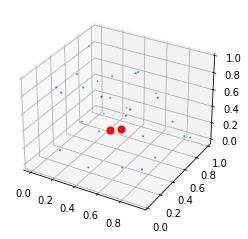

SystemExit: 

In [6]:
'''
Given an input array finds the closest pair.  Achieves matching using scipy's cKDTree, very quick even for 
millions of points.  Speed ups may be achieved using pyflann: 
https://github.com/mariusmuja/flann/tree/master/src/python/pyflann  

User must input number of points to generate and the number of dimensions to use.  For 2D and 3D
plots are generated. 
'''
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.spatial as spatial 
from mpl_toolkits.mplot3d import Axes3D

def show_2d(r_pts, closest):
    if closest == None:
        plt.plot(r_pts[:,1],r_pts[:,0],'b.')
        plt.show()
    else:
        plt.plot(r_pts[:,1],r_pts[:,0],'b.')
        #recolour closest points
        plt.plot([r_pts[closest[0],1],r_pts[closest[1],1]],
                 [r_pts[closest[0],0],r_pts[closest[1],0]],
                 'ro')
        plt.show()
    plt.close()
    
def show_3d(r_pts, closest):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    if closest == None:     
        ax.scatter(r_pts[:,0], r_pts[:,1], r_pts[:,2], s=5, marker='.') #x,y,z
        plt.show()
    else:
        ax.scatter(r_pts[:,0], r_pts[:,1], r_pts[:,2], s=5, marker='.') #x,y,z
        ax.scatter(r_pts[closest[0],0], r_pts[closest[0],1], r_pts[closest[0],2], s=50, c='r')
        ax.scatter(r_pts[closest[1],0], r_pts[closest[1],1], r_pts[closest[1],2], s=50, c='r')
        plt.show()
    plt.close()
        
          
def get_closest_pair(r_pts):
    
    #make kdtree and self compare
    tree = spatial.cKDTree(r_pts)

    #compute the distances (take the 2 closest as the
    #first distance is a self-comparison.
    distances, indexes = tree.query(r_pts, 2)
    
    #find minimum non self-reference distance
    mindist_pos = np.argmin(distances[:,1])
    print('L2-norm distance', distances[mindist_pos,1])
    print('pt1 coords', r_pts[mindist_pos])
    print('pt2 coords', r_pts[indexes[mindist_pos,1]])
    
    #return the two indexes associated with the minimum distance
    return mindist_pos, indexes[mindist_pos,1] 

def main():
    
    #get grid size
    print('please enter number of random points: ')
    n_points = int(input())
    print('please enter the number (e.g. 2,3,4,...) of dimensions (2D or 3D will plot): ')
    dims = int(input())
    
    #make random x and y values
    random_points = np.random.rand(n_points,dims)
        
    #find the closest point pair
    closest_index = get_closest_pair(random_points)
    
    #replot
    if dims == 2:
        show_2d(random_points, closest_index)
    if dims == 3:
        show_3d(random_points, closest_index)
    
if __name__ == '__main__':
    sys.exit(main())

## Notations

**scipy.spatial.cKDTree**

[scipy.spatial.cKDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html)

kd-tree for quick nearest-neighbor lookup

This class provides an index into a set of k-dimensional points which can be used to rapidly look up the nearest neighbors of any point.

**cKDTree Method: query**

[cKDTree.query()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.query.html#scipy.spatial.cKDTree.query)

Query the kd-tree for nearest neighbors

**np.random.rand**

[np.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).